In [2]:
import pandas as pd
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [53]:
df = pd.read_csv('/content/drive/MyDrive/Data Analytics and Data Mining/Assignment/cleaned_grid_10.csv')

In [54]:
df.head()

,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,...,"[8,5]","[8,7]","[8,8]","[8,9]","[9,0]","[9,1]","[9,2]","[9,3]","[9,4]","[9,9]"
0,0.872912,0.092738,0.084675,0.195422,0.250,0.2,0.333333,0.142857,0.833333,2.028094e-08,...,0,0,0,0,0,0,0,0,0,0
1,0.538186,0.110236,0.117329,0.197604,0.250,0.4,0.333333,0.285714,0.818182,6.523868e-08,...,0,0,0,0,0,0,0,0,0,0
2,0.757757,0.041995,0.210188,0.301329,0.375,0.4,0.333333,0.428571,0.833333,4.855436e-08,...,0,0,0,0,0,0,0,0,0,0
3,0.575179,0.120735,0.060695,0.200164,0.375,0.2,0.333333,0.142857,0.878788,2.587568e-08,...,0,0,0,0,0,0,0,0,0,0
4,0.552506,0.250219,0.079981,0.116387,0.250,0.2,0.333333,0.142857,0.151515,3.187004e-08,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(314087, 234)

In [6]:
df = df.dropna()

In [4]:
df_scaled = pd.read_csv('/content/drive/MyDrive/Data Analytics and Data Mining/Assignment/cleaned_grid_20_scaled.csv')

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
X = df.drop('price', axis=1)
y = df['price']

In [7]:
df_grid_only = df.drop(['district_2.0', 'district_3.0', 'district_4.0',
              'district_5.0', 'district_6.0', 'district_7.0', 'district_8.0',
              'district_9.0', 'district_10.0', 'district_11.0', 'district_12.0', 'district_13.0'], axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['DOM', 'followers', 'totalPrice', 'price', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom',
       'constructionTime',
       'ladderRatio',
       'communityAverage', 'tradeTime_month_sin',
       'tradeTime_month_cos', 'floorHeight'])
    ], remainder='passthrough')
df_scaled = ct.fit_transform(df_grid_only)

df_scaled = pd.DataFrame(df_scaled, columns=df_grid_only.columns)

In [74]:
df_grid_only = pd.read_csv('/content/drive/MyDrive/Data Analytics and Data Mining/Assignment/cleaned_en_mc_scaled.csv')

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_all = scaler.fit_transform(df_grid_only)
df_scaled_all = pd.DataFrame(df_scaled_all, columns=df_grid_only.columns)

In [24]:
df_scaled_all.head()

,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,...,"[18,6]","[18,7]","[18,18]","[18,19]","[19,1]","[19,2]","[19,4]","[19,5]","[19,6]","[19,9]"
0,38.682543,2.610537,0.298880,1.341890,-0.006448,-0.327510,0.051923,-0.433096,0.670977,-0.002530,...,-0.017846,-0.015351,-0.024211,-0.002523,-0.008742,-0.005918,-0.031023,-0.046717,-0.0182,-0.005047
1,23.679649,3.195545,1.012429,1.380340,-0.006448,1.602846,0.051923,1.922930,0.553438,-0.002512,...,-0.017846,-0.015351,-0.024211,-0.002523,-0.008742,-0.005918,-0.031023,-0.046717,-0.0182,-0.005047
2,33.521120,0.914013,3.041584,3.208636,1.296775,1.602846,0.051923,4.278956,0.670977,-0.002519,...,-0.017846,-0.015351,-0.024211,-0.002523,-0.008742,-0.005918,-0.031023,-0.046717,-0.0182,-0.005047
3,25.337723,3.546550,-0.225132,1.425476,1.296775,-0.327510,0.051923,-0.433096,1.023595,-0.002528,...,-0.017846,-0.015351,-0.024211,-0.002523,-0.008742,-0.005918,-0.031023,-0.046717,-0.0182,-0.005047
4,24.321484,7.875611,0.196308,-0.051204,-0.006448,-0.327510,0.051923,-0.433096,-4.618292,-0.002525,...,-0.017846,-0.015351,-0.024211,-0.002523,-0.008742,-0.005918,-0.031023,-0.046717,-0.0182,-0.005047


In [5]:
df_scaled.head()

,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,...,"[18,6]","[18,7]","[18,18]","[18,19]","[19,1]","[19,2]","[19,4]","[19,5]","[19,6]","[19,9]"
0,38.682543,2.610537,0.298880,-0.549625,1.341890,-0.006448,-0.327510,0.051923,-0.433096,0.670977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23.679649,3.195545,1.012429,-0.005051,1.380340,-0.006448,1.602846,0.051923,1.922930,0.553438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33.521120,0.914013,3.041584,0.392632,3.208636,1.296775,1.602846,0.051923,4.278956,0.670977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.337723,3.546550,-0.225132,-0.988675,1.425476,1.296775,-0.327510,0.051923,-0.433096,1.023595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.321484,7.875611,0.196308,0.224711,-0.051204,-0.006448,-0.327510,0.051923,-0.433096,-4.618292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_scaled.to_csv('/content/drive/MyDrive/Data Analytics and Data Mining/Assignment/cleaned_grid_20_scaled.csv', index=False)

In [6]:
df_scaled.shape

(314087, 222)

In [7]:
X_g = df_scaled.drop(['price', 'totalPrice', '[8,8]', '[14,8]'], axis=1)
y_g = df_scaled['price']

In [61]:
# After fixes, recalculate:
vif = [variance_inflation_factor(X_g.values, i)
       for i in range(X_g.shape[1])]

pd.DataFrame({
    'Feature': X_g.columns,
    'VIF': vif
}).sort_values('VIF', ascending=False).to_csv('/content/drive/MyDrive/Data Analytics and Data Mining/Assignment/vif_grid_20_only.csv')

In [9]:
import statsmodels.api as sm

In [10]:
# Add constant for intercept
X_g = sm.add_constant(X_g)

# Fit the model
model = sm.OLS(y_g, X_g).fit()
model.summary()

KeyboardInterrupt: 

In [11]:
from sklearn.model_selection import train_test_split

In [ ]:
# Grid 20
# X_g = df_grid_only.drop(['price', 'totalPrice', '[8,8]', '[14,8]', 'drawingRoom', 'ladderRatio', 'buildingStructure_5.0', 'subway_1.0', 'district_2.0', 'district_3.0', 'district_4.0', 'district_11.0', 'district_12.0', 'floorType_0.0', 'floorType_1.0', 'floorType_3.0', '[0,0]', '[1,0]', '[1,10]', '[3,0]', '[3,2]', '[4,3]', '[4,4]', '[4,11]', '[4,14]', '[5,4]', '[6,7]', '[6,8]', '[6,9]', '[6,15]', '[7,3]', '[7,14]', '[8,2]', '[8,4]', '[8,5]', '[8,12]', '[9,3]', '[9,4]', '[9,6]', '[9,10]', '[9,14]', '[10,4]', '[10,5]', '[10,10]', '[10,14]', '[10,15]', '[11,4]', '[11,5]', '[11,13]', '[12,7]', '[12,8]', '[12,9]', '[12,12]', '[13,17]', '[14,3]', '[14,6]', '[15,2]', '[15,5]', '[15,6]', '[15,7]', '[15,10]', '[15,12]', '[15,14]', '[16,2]', '[16,5]', '[16,17]', '[16,10]', '[16,11]', '[17,8]', '[17,11]', '[18,3]', '[18,4]', '[18,6]', '[18,7]', '[18,19]', '[19,1]', '[19,5]', '[19,9]'], axis=1)
# y_g = df_grid_only['price']

In [66]:
# Grid 10
# X_g = df_grid_only.drop(['price', 'totalPrice', 'drawingRoom', 'constructionTime', 'ladderRatio', 'buildingStructure_2.0',
#     'buildingStructure_5.0', 'district_2.0', 'district_3.0', 'district_4.0',
#     'district_6.0', 'district_8.0', 'district_11.0', 'district_12.0',
#     'district_13.0', 'floorType_0.0', 'floorType_1.0', 'floorType_3.0',
#     '[0,0]', '[0,3]', '[0,4]', '[0,5]', '[1,1]', '[1,4]', '[1,7]',
#     '[2,1]', '[2,3]', '[2,5]', '[2,6]', '[2,8]', '[3,1]', '[3,2]',
#     '[3,5]', '[3,6]', '[3,8]', '[4,7]', '[5,0]', '[5,1]', '[6,1]',
#     '[6,2]', '[6,4]', '[6,5]', '[7,1]', '[7,2]', '[7,4]', '[7,6]',
#     '[7,7]', '[7,9]', '[8,1]', '[8,4]', '[8,5]', '[8,8]', '[9,0]',
#     '[9,3]', '[9,4]'], axis=1)
# y_g = df_grid_only['price']

In [79]:
# District
X_g = df_grid_only.drop(['price', 'totalPrice', 'ladderRatio', 'buildingStructure_1.0', 'buildingStructure_2.0',
    'buildingStructure_5.0', 'district_2.0', 'district_3.0',
    'district_7.0', 'floorType_0.0', 'floorType_1.0', 'floorType_3.0'], axis=1)
y_g = df_grid_only['price']

In [80]:
X_g.shape

(314087, 33)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X_g, y_g, test_size=0.33, random_state=42)

In [82]:
# Add constant for intercept
X_train = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                 1.093e+04
Date:                Sat, 12 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:32:21   Log-Likelihood:             2.2270e+05
No. Observations:              210438   AIC:                        -4.453e+05
Df Residuals:                  210404   BIC:                        -4.450e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0770      0.003     29.216      0.000       0.072       0.082
DOM                         1.0148      0.010    104.958      0.000       0.996       1.034
followers                   0.5704      0.007     77.360      0.000       0.556       0.585
square                     -0.2383      0.007    -34.760      0.000      -0.252      -0.225
livingRoom                  0.0229      0.003      7.429      0.000       0.017       0.029
drawingRoom                -0.0066      0.002     -2.886      0.004      -0.011      -0.002
kitchen                     0.0676      0.006     12.082      0.000       0.057       0.079
bathRoom                    0.0615      0.004     13.723      0.000       0.053       0.070
constructionTime           -0.0139      0.002     -6.932      0.000      -0.018      -0.010
communityAverage            0.7025      0.002    302.032      0.000       0.698       0.707
tradeTime_month_sin         0.0160      0.001     31.077      0.000       0.015       0.017
tradeTime_month_cos         0.0137      0.001     25.905      0.000       0.013       0.015
floorHeight                -0.0058      0.001     -4.266      0.000      -0.009      -0.003
buildingType_1.0           -0.0083      0.001    -13.431      0.000      -0.010      -0.007
buildingType_2.0            0.0531      0.019      2.848      0.004       0.017       0.090
buildingType_3.0           -0.0079      0.001    -12.483      0.000      -0.009      -0.007
renovationCondition_1.0    -0.0748      0.000   -167.664      0.000      -0.076      -0.074
renovationCondition_2.0    -0.0233      0.001    -15.850      0.000      -0.026      -0.020
renovationCondition_3.0    -0.0032      0.000     -6.398      0.000      -0.004      -0.002
buildingStructure_3.0       0.1219      0.016      7.775      0.000       0.091       0.153
buildingStructure_4.0      -0.0058      0.001     -6.236      0.000      -0.008      -0.004
elevator_1.0                0.0052      0.001      8.279      0.000       0.004       0.006
fiveYearsProperty_1.0      -0.0211      0.000    -52.219      0.000      -0.022      -0.020
subway_1.0                  0.0037      0.000      9.052      0.000       0.003       0.005
district_4.0               -0.0055      0.001     -5.853      0.000      -0.007      -0.004
district_5.0               -0.0210      0.002    -10.173      0.000      -0.025      -0.017
district_6.0               -0.0058      0.001     -8.332      0.000      -0.007      -0.004
district_8.0                0.0061      0.001      9.677      0.000       0.005       0.007
district_9.0                0.0054      0.001      5.220      0.000       0.003       0.007
district_10.0              -0.0112      0.001    -13.545      0.000      -0.013      -0.010
district_11.0              -0.0167      0.001  

In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [83]:
y_pred_train = model.predict(X_train)

In [84]:
print('R2 score:', r2_score(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSLE:', np.sqrt(mean_squared_log_error(y_train, y_pred_train)))

R2 score: 0.6315977068419545
MSE: 0.00705207181402758
RMSE: 0.0839766146854443
RMSLE: 0.06144266962137108


In [85]:
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

In [86]:
print('R2 score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))

R2 score: 0.6270541565651925
MSE: 0.007078212283999281
RMSE: 0.08413211208569105
RMSLE: 0.06159318107854622


In [ ]:
df_grid_only.to_csv('/content/drive/MyDrive/Data Analytics and Data Mining/Assignment/df_grid_20_only.csv', index=False)

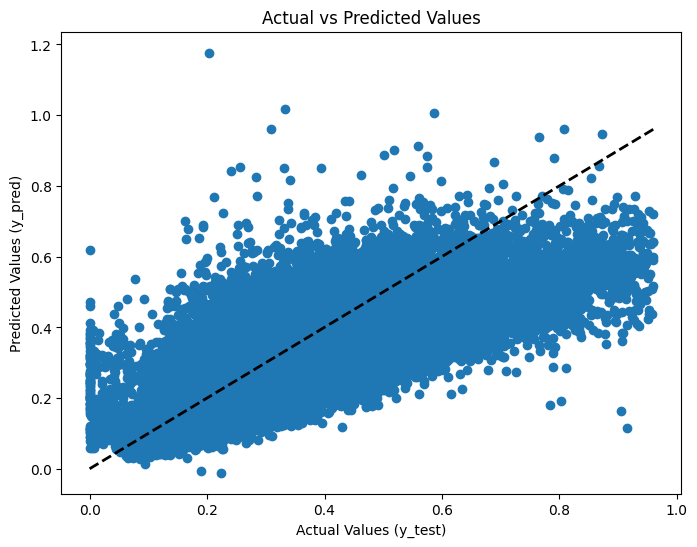

In [87]:
# prompt: plot y_test vs y_pred. add a line for perfect prediction

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.show()
